# MUHAMMED SHAHIL T

# SALES PREDICTION

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [3]:
df=pd.read_csv(r"C:\Users\shahi\Documents\Downloads\Advertising.csv")

In [4]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


The given dataset contains 150 rows and 7 columns.

# Basic understanding of the data

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.shape

(200, 5)

In [9]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [10]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


We could get a basic statistical understanding about the data such as the count, mean, standard deviation, quartile values , etc. from this step.

In [12]:
df.count()

Unnamed: 0    200
TV            200
Radio         200
Newspaper     200
Sales         200
dtype: int64

In [13]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
Radio         0.094175
Newspaper     0.894720
Sales         0.407571
dtype: float64

In [14]:
df.median()

Unnamed: 0    100.50
TV            149.75
Radio          22.90
Newspaper      25.75
Sales          12.90
dtype: float64

Skew and the median could be obtained from this step

### Checking for null or duplicated values

In [15]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [16]:
df.duplicated().sum()

0

There are no null values or duplicate values in the given dataset.

In [17]:
df=df.drop(["Unnamed: 0"],axis=1)

In [18]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


We actually doesn't need the column "Unnamed:0", so we have dropped that column.

In [19]:
numerical=["TV","Radio","Newspaper"]
cateorical=["Sales"]

We have separated the numerical and categorical columns and made it into a separate list.

## Removing of Outliers

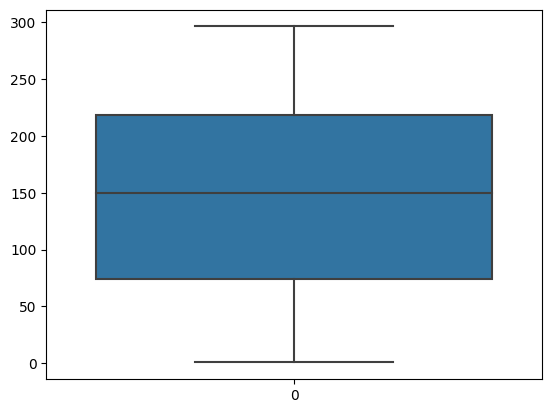

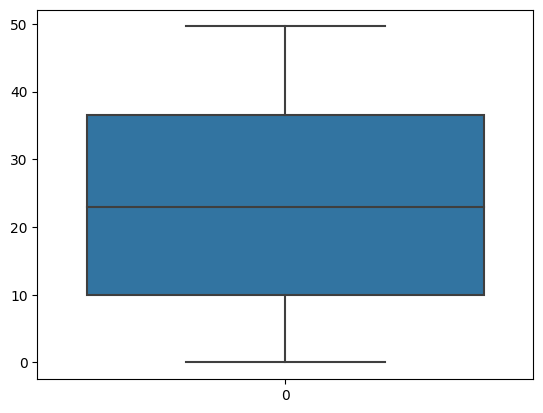

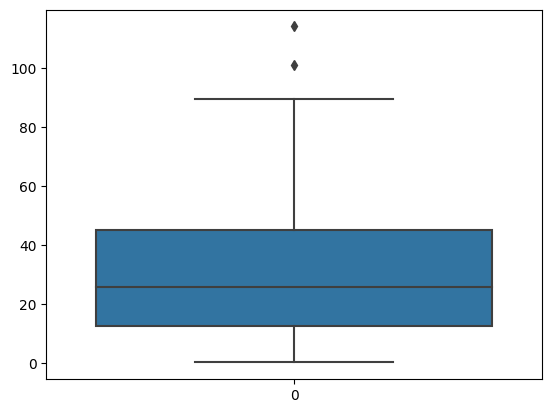

In [20]:
for i in numerical:
    sns.boxplot(data=df[i])
    plt.show()

In [21]:
for i in numerical:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    
    IQR=Q3-Q1
    low=Q1-1.5*IQR
    up=Q3+1.5*IQR
    
    for j in df[i]:
        if j<low:
            df=df.replace(j,low)
        if j>up:
            df=df.replace(j,up)

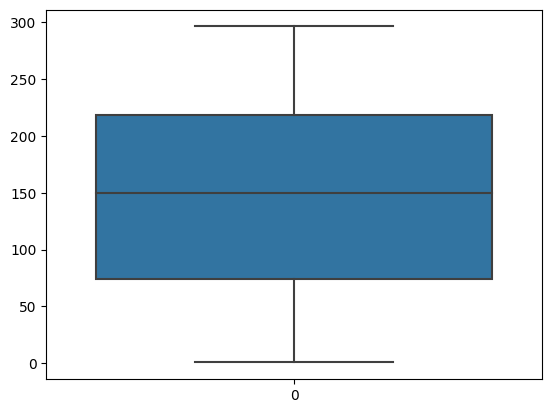

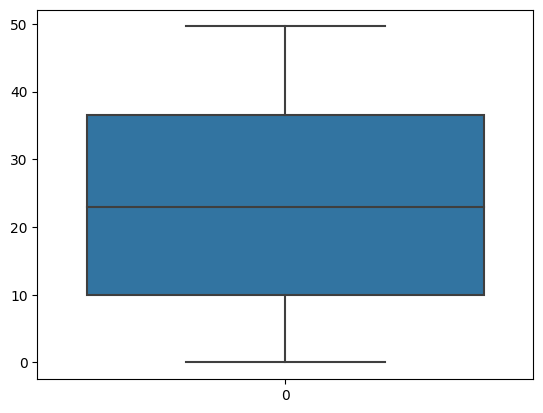

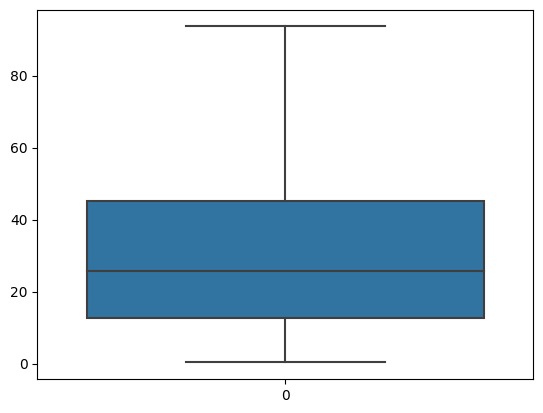

In [22]:
for i in numerical:
    sns.boxplot(data=df[i])
    plt.show()

By using boxplot, we have plotted the outliers in the dataset. We have removed all the outliers providing them with appropriate lower and upper limit values.

# Data Visualization

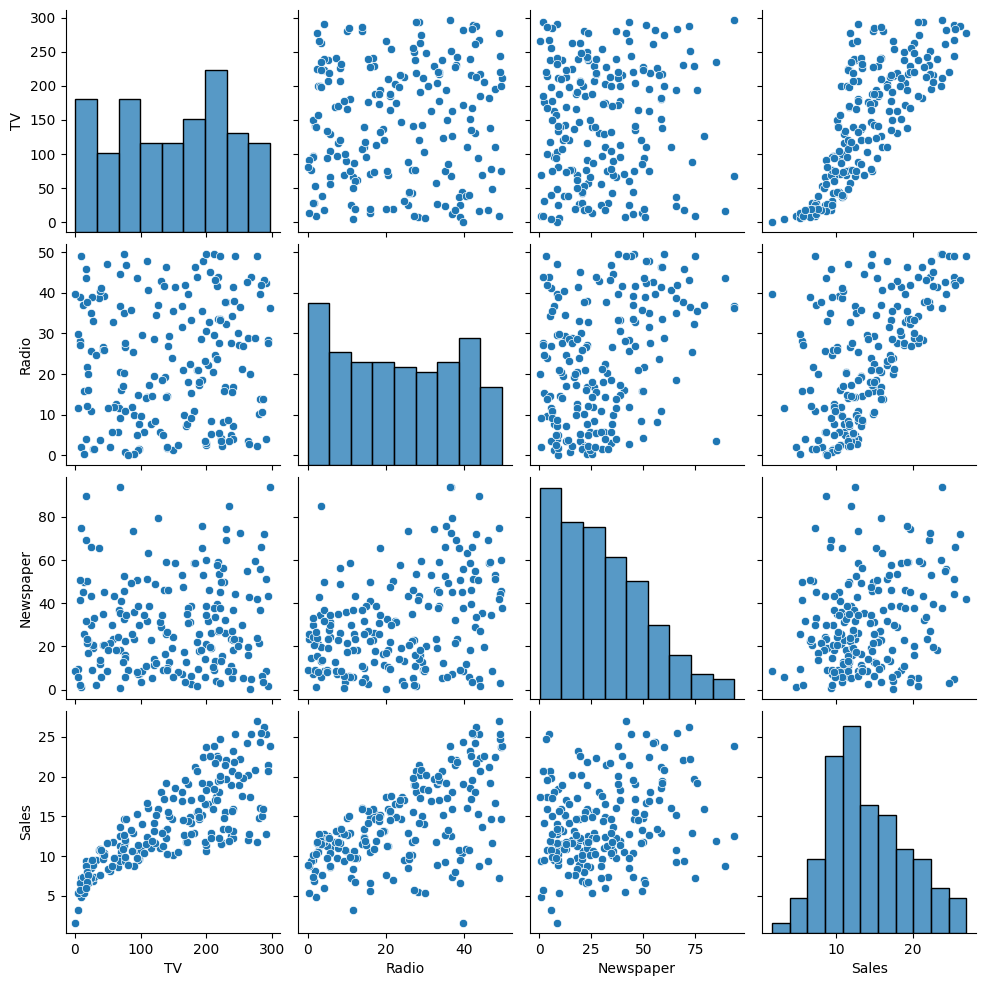

In [23]:
sns.pairplot(data=df)
plt.show()

Pairplot gives us a pictorial representaion of the dataset by considering all the columns and how each columns are related to each other.

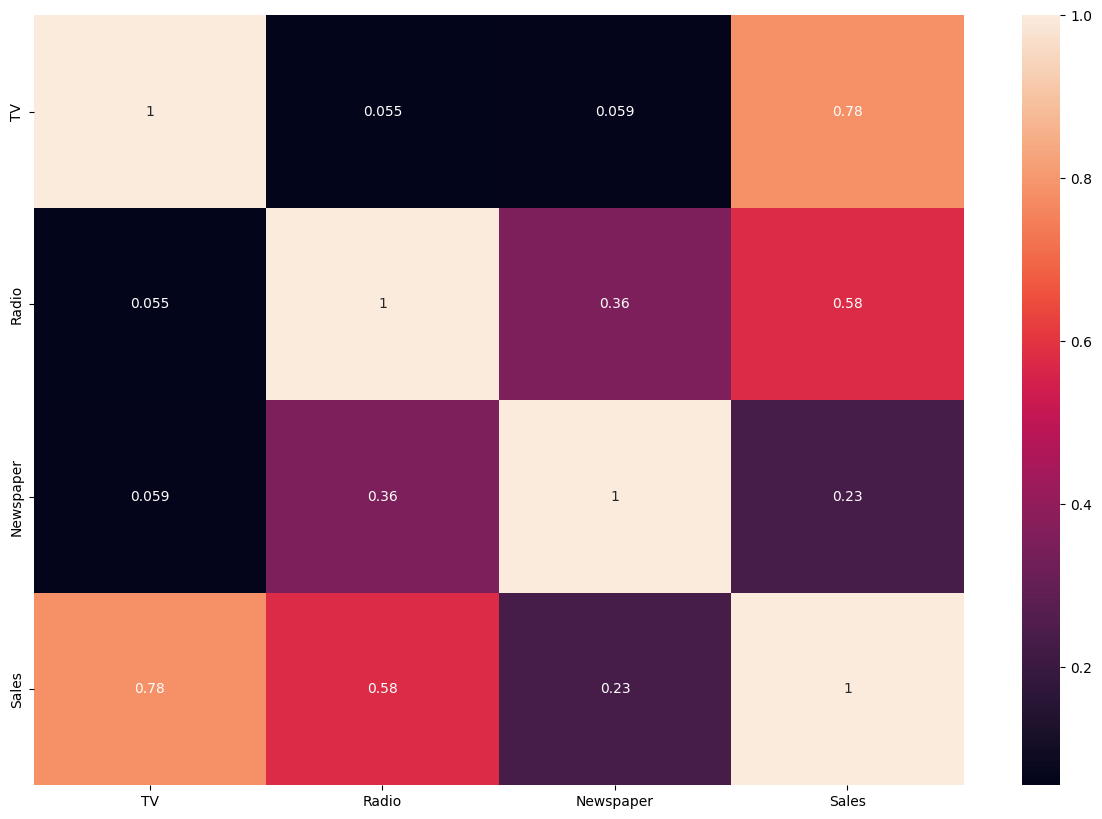

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

Using the heatmap, we could understand the correlation between each attributes.

Here, Tv and Radio and Tv and Newspaper are negatively correlated ie., whenone value increases the other value decreases and vice-versa.

Similarly, Tv and Sales and Tv and Radio are highly positively correlated ie.,when one value increases, the other value also would increase.

# Splitting the dataset

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x=df.drop(['Sales'],axis=1)
y=df['Sales']

In [27]:
X_test,X_train,Y_test,Y_train=train_test_split(x,y,random_state=42,test_size=0.3)

In [28]:
X_train.shape, Y_train.shape

((60, 3), (60,))

In [29]:
X_test.shape,Y_test.shape

((140, 3), (140,))

# Fitting the model

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()

In [32]:
model.fit(X_train,Y_train)

LinearRegression()

In [33]:
y_pred=model.predict(X_test)

# Evaluating the performance of the model

In [34]:
from sklearn.metrics import mean_squared_error,r2_score

In [35]:
print('Training Accuracy: ', model.score(X_train, Y_train))


Training Accuracy:  0.8938689022162755


In [36]:
print('Testing Accuracy: ', model.score(X_test, Y_test))

Testing Accuracy:  0.8754493610901629


In [37]:
print("Mean Squared Error:", mean_squared_error(Y_test, y_pred))


Mean Squared Error: 3.268332298893126


In [38]:
print("R-squared:", r2_score(Y_test, y_pred))

R-squared: 0.8754493610901629


# Saving the model

In [39]:
import pickle

In [40]:
saved_model=pickle.dumps(model)
model_from_pickle=pickle.loads(saved_model)
model_from_pickle.predict(X_test)

array([19.19751098, 15.74267393, 11.28667426,  9.37298181, 18.39146983,
        6.67639828, 22.60139417,  5.96984051, 10.74100465, 11.05417989,
        9.9386549 ,  7.23340355, 15.37094159, 17.15124034, 14.51739902,
       17.09025906, 15.20244998, 19.91663682, 14.3466678 , 21.39385574,
       10.79848774, 13.92884813,  8.92516328, 17.40405829,  8.86272081,
       14.99500982, 12.84116162, 23.91962555, 12.15477268, 22.63319751,
        5.89904057, 17.70452175, 22.65954941, 19.94465716, 18.02448544,
       16.70545612, 12.45469594, 11.36489224, 17.74998242, 14.14704865,
       13.22631155,  7.98468202, 19.29243131, 10.54138325, 20.5079056 ,
       10.01621061,  7.25608744, 17.43620626, 14.67201639, 16.41016168,
       10.23308633, 20.02144695, 23.43331905, 17.94031449, 17.78014409,
       15.11008195, 16.60819454,  8.23699666, 17.56903895, 19.92505007,
       16.67590471,  3.69449173,  5.4540026 , 14.5190414 , 16.7272487 ,
       17.1424727 , 19.08386623, 22.96195258, 15.39156471, 20.51

Firstly we will be using the dump() function to save the model using pickle.Then we will be loading that saved model.lastly, after loading that model we will use this to make predictions.

# Prediction on Unknown Data

In [41]:
print(model.predict([[150,48,68]]))

[17.7705622]


# THANK YOU